Q1. What is the mathematical formula for a linear SVM?
--
---
The mathematical formula for a linear Support Vector Machine (SVM) is $$f(x) = w^T * x + b$$
- w is the weight vector that you want to minimize
- x is the data that you're trying to classify
- b is the linear coefficient estimated from the training data

Q2. What is the objective function of a linear SVM?
--
---
The objective function of a linear Support Vector Machine (SVM) is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space¹. The hyperplane tries to maximize the margin between the closest points of different classes.

Q3. What is the kernel trick in SVM?
--
----
The kernel trick is a powerful technique that enables Support Vector Machines (SVMs) to solve non-linear classification problems. It works by implicitly mapping the input data to a higher-dimensional feature space. This allows us to find a hyperplane that separates the different classes of data.

In essence, the kernel trick offers a more efficient and less expensive way to transform data into higher dimensions. It allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.

For example, if we have a non-linearly separable problem in a 2-dimensional space, we can use the kernel trick to map the data into a 3-dimensional space where it becomes linearly separable. This is achieved without explicitly calculating the coordinates of the data in the 3-dimensional space.

This method is generally used on datasets with lower dimensions, and it's particularly useful when the data are randomly distributed, which makes it hard to separate different classes linearly.

Q4. What is the role of support vectors in SVM Explain with example
--
---
Support vectors play a crucial role in the Support Vector Machine (SVM) algorithm. They are the data points or vectors that are closest to the hyperplane and affect the position of the hyperplane. These vectors support the hyperplane, hence they are called Support Vector.

Q5.Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?
--
---
Sure, let's go through each of these concepts in SVM:

1. **Hyperplane**: In SVMs, a hyperplane is a subspace of one dimension less than the original feature space. In two-dimensional space, a hyperplane is a line, while in three-dimensional space, it is a plane. The hyperplane in SVMs is represented by the equation: $$f(x) = w^T * x + b$$ where $w$ is the weight vector, $x$ is a data point, and $b$ is the bias term. The weight vector determines the "shape" of the hyperplane, and the bias term determines its position. 


2. **Marginal Plane**: The margin in SVMs is defined by two parallel hyperplanes that are as far apart as possible while still separating the data. These hyperplanes are determined by the support vectors, which are the data points closest to the decision boundary. The distance between these two hyperplanes is what we refer to as the "margin". The goal of SVMs is to maximize this margin.

3. **Soft Margin**: In scenarios where the data is not linearly separable or when we want to allow some misclassifications for better generalization, we use what's known as a "soft margin". This means that some data points can be within the margin or even on the wrong side of the hyperplane. These misclassifications are penalized based on their distance from the margin.

4. **Hard Margin**: When the data is linearly separable and we don't want any misclassifications, we use SVM with a "hard margin". This means that all data points from each class must be on the correct side of their respective marginal hyperplane. However, hard-margin SVMs can be sensitive to outliers and may not generalize well to unseen data.

Q6. SVM Implementation through Iris dataset.
--
---
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df['Target']=iris.target

In [7]:
df1=df[df['Target']!=2]

In [18]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

~ Train a linear SVM classifier on the training set and predict the labels for the testing set
--

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

~ Compute the accuracy of the model on the testing setCompute the accuracy of the model on the testing set
--

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


~ Plot the decision boundaries of the trained model using two of the features
--

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


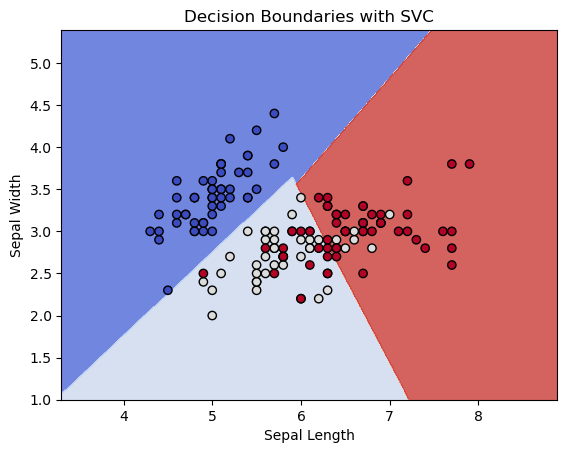

In [32]:

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


model = SVC(kernel='linear')
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundaries with SVC')
plt.show()


~ Try different values of the regularisation parameter C and see how it affects the performance of the model
--

In [35]:
from sklearn.svm import SVC
svc1=SVC(kernel='linear',C=5)
svc1.fit(X_train,y_train)
y_pred=svc1.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred))

1.0


In [37]:
from sklearn.svm import SVC
svc2=SVC(kernel='linear',C=7)
svc2.fit(X_train,y_train)
y_pred=svc2.predict(X_test)

In [38]:
print(accuracy_score(y_test,y_pred))

1.0


In [39]:
# Accuracy score is same for different C value